In [1]:
import numpy as np
import pandas as pd
import sklearn.cross_validation as cv
import sklearn.metrics as metrics

from sklearn.ensemble import RandomForestClassifier

In [11]:
# Read feature metadata.
readings     = pd.read_csv('ucihar/cleaned_features.csv', index_col=0)
column_names = []
for i in range(len(readings['reading'].values)):
    column_names.append('x{}'.format(i))
column_names[0:10]

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

In [38]:
# Read training data.
# Only use subjects >= 27 for training.
subj_train        = pd.read_table('ucihar/train/subject_train.txt', header=None, names=['subject'])
X_train           = pd.read_csv('ucihar/train/X_train.csv', header=None, names=column_names)
y_train           = pd.read_table('ucihar/train/y_train.txt', header=None, names=['activity'])
X_train           = X_train[subj_train['subject'] >= 27]
y_train           = y_train[subj_train['subject'] >= 27]

In [45]:
# Read testing data.
# Only use subjects <= 6 for testing.
subj_test        = pd.read_table('ucihar/test/subject_test.txt', header=None, names=['subject'])
X_test           = pd.read_csv('ucihar/test/X_test.csv', header=None, names=column_names)
y_test           = pd.read_table('ucihar/test/y_test.txt', header=None, names=['activity'])
X_validate       = X_test[(subj_test['subject'] >= 21) & (subj_test['subject'] < 27)]
y_validate       = y_test[(subj_test['subject'] >= 21) & (subj_test['subject'] < 27)]
X_test           = X_test[subj_test['subject'] <= 6]
y_test           = y_test[subj_test['subject'] <= 6]

In [40]:
# Fit a random forest classifier with 50 estimators.
clf = RandomForestClassifier(n_estimators=50)
clf = clf.fit(X_train, y_train['activity'])

In [41]:
clf.score(X_test, y_test['activity'])

0.81710213776722085

In [53]:
clf.oob_score

False

In [51]:
# Evaluate the model against the data for subjects >= 21 and < 27.
score = cv.cross_val_score(clf, X_validate, y_validate['activity'], scoring='accuracy', cv=10)
score

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [52]:
# Create a data frame for the feature importances.
importance_data = { 'name': column_names, 'importance': clf.feature_importances_ }
importances     = pd.DataFrame(importance_data, columns=['name', 'importance'])
importances.sort_values(by='importance', ascending=False)[0:10]

,name,importance
58,x58,0.040145
49,x49,0.033965
40,x40,0.031736
56,x56,0.028563
54,x54,0.026249
42,x42,0.021126
559,x559,0.019981
52,x52,0.019494
558,x558,0.019108
55,x55,0.017451


In [64]:
%matplotlib inline

import matplotlib.pyplot as plt

activities        = pd.read_table('ucihar/cleaned_labels.txt', names=['activity'])
activities.index += 1
activities

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [65]:
target_names = activities['activity'].values.tolist()

# Plot a confusion matrix.
def plot_confusion_matrix(cm, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

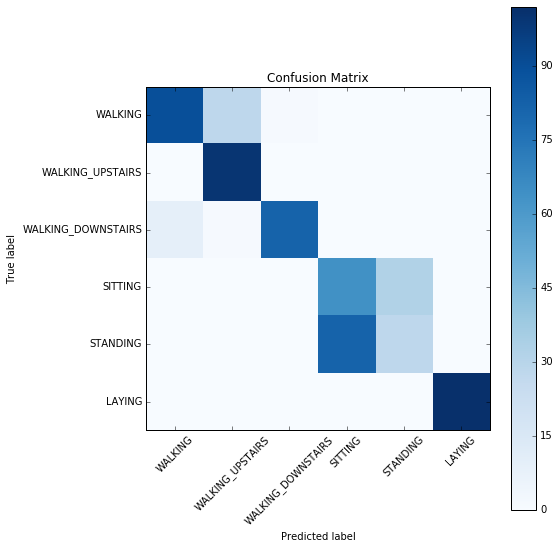

In [69]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix.
y_pred = clf.predict(X_test)
cm     = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
plot_confusion_matrix(cm)